In [1]:
import numpy as np
import pandas as pd
import torch
from torch import tensor, nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from LinearModels import LinearRegression, LogisticRegression, LassoRegression

In [3]:
from NeuralNet import ANN

# Test the Linear Regression Model

In [34]:
from sklearn.datasets import fetch_california_housing

In [35]:
cal = fetch_california_housing()

In [36]:
cal_df = pd.DataFrame(cal['data'], columns=cal['feature_names'])
cal_df['target'] = cal['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cal_df.iloc[:, :-1], cal_df.iloc[:, -1], test_size=0.2, random_state=42)

In [38]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values

In [39]:
# standardize features
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [40]:
# standardize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

In [41]:
reg = LinearRegression(lr=0.1, max_iter=10000)
reg.fit(X_train, y_train)

In [42]:
# predict on test set and inverse transform the standardized target
y_pred = reg.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [43]:
print(f'MSE: {(np.subtract(y_test, y_pred.flatten())**2).mean():.2f}')

MSE: 0.56


In [44]:
weight = pd.DataFrame(reg.weights, index=cal['feature_names'], columns=['Weights'])
weight.loc['bias', 'Weights'] = reg.bias
weight

,Weights
MedInc,7.389634e-01
HouseAge,1.059913e-01
AveRooms,-2.546379e-01
AveBedrms,2.934285e-01
Population,-1.995970e-03
AveOccup,-3.531345e-02
Latitude,-7.757617e-01
Longitude,-7.523338e-01
bias,1.441009e-15


In [49]:
reg = LassoRegression(lr=0.001, max_iter=10000)
reg.fit(X_train, y_train)

In [50]:
# predict on test set and inverse transform the standardized target
y_pred = reg.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [51]:
print(f'MSE: {(np.subtract(y_test, y_pred.flatten())**2).mean():.2f}')

MSE: 0.56


In [52]:
weight = pd.DataFrame(reg.weights, index=cal['feature_names'], columns=['Weights'])
weight.loc['bias', 'Weights'] = reg.bias
weight

,Weights
MedInc,7.235257e-01
HouseAge,1.635581e-01
AveRooms,-1.300928e-01
AveBedrms,1.540164e-01
Population,2.831524e-02
AveOccup,-4.997777e-02
Latitude,-4.885429e-01
Longitude,-4.588614e-01
bias,8.412798e-16


# Test Regressopm ANN

In [15]:
device = 'mps'
ann = ANN(input_size=X_train.shape[1], hidden_size=4, output_size=1, problem='regression')
ann.to(device)

ANN(
  (l1): Linear(in_features=8, out_features=4, bias=True)
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
X_train = tensor(X_train.astype(np.float32)).to(device)
X_test = tensor(X_test.astype(np.float32)).to(device)
y_train = tensor(y_train.astype(np.float32).reshape(-1, 1)).to(device)

In [16]:
ann.fit(X_train, y_train, max_iter=10000, lr=0.1)

Epoch [100/10000], Loss: 0.3657
Epoch [200/10000], Loss: 0.3303
Epoch [300/10000], Loss: 0.3143
Epoch [400/10000], Loss: 0.3031
Epoch [500/10000], Loss: 0.3131
Epoch [600/10000], Loss: 0.3099
Epoch [700/10000], Loss: 0.3051
Epoch [800/10000], Loss: 0.3026
Epoch [900/10000], Loss: 0.3005
Epoch [1000/10000], Loss: 0.2974
Epoch [1100/10000], Loss: 0.2952
Epoch [1200/10000], Loss: 0.2936
Epoch [1300/10000], Loss: 0.2912
Epoch [1400/10000], Loss: 0.2897
Epoch [1500/10000], Loss: 0.2878
Epoch [1600/10000], Loss: 0.2866
Epoch [1700/10000], Loss: 0.2845
Epoch [1800/10000], Loss: 0.2851
Epoch [1900/10000], Loss: 0.2830
Epoch [2000/10000], Loss: 0.2828
Epoch [2100/10000], Loss: 0.2820
Epoch [2200/10000], Loss: 0.2805
Epoch [2300/10000], Loss: 0.2793
Epoch [2400/10000], Loss: 0.2781
Epoch [2500/10000], Loss: 0.2767
Epoch [2600/10000], Loss: 0.2771
Epoch [2700/10000], Loss: 0.2762
Epoch [2800/10000], Loss: 0.2748
Epoch [2900/10000], Loss: 0.2743
Epoch [3000/10000], Loss: 0.2739
Epoch [3100/10000],

In [19]:
y_pred = ann.predict(X_test)
y_pred = y_pred.to('cpu').detach().numpy()

In [20]:
# y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(y_pred)

In [21]:
print(f'MSE: {(np.subtract(y_test, y_pred.flatten())**2).mean():.2f}')

MSE: 0.33


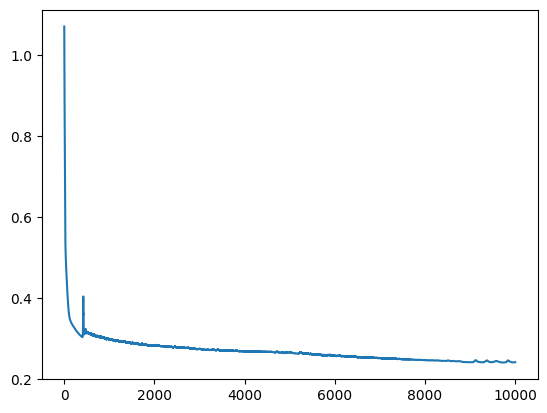

In [22]:
plt.plot(ann.loss)

# Test the Logistic Regression Model

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
wisc = load_breast_cancer()

In [21]:
wisc_df = pd.DataFrame(wisc['data'], columns=wisc['feature_names'])
wisc_df['target'] = wisc['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(wisc_df.iloc[:,:-1], wisc_df.iloc[:,-1], test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
logreg = LogisticRegression(lr=0.01, max_iter=10000)
logreg.fit(X_train, y_train)

In [25]:
y_pred = logreg.predict(X_test)

In [26]:
print(f"Accuracy: {np.mean(y_pred == y_test):.2f}")

Accuracy: 0.94


In [27]:
weight = pd.DataFrame(logreg.weights, index=wisc['feature_names'], columns=['Weights'])
weight.loc['bias', 'Weights'] = logreg.bias
weight

,Weights
mean radius,0.000036
mean texture,-0.000274
mean perimeter,0.000469
mean area,-0.000116
mean smoothness,-0.000047
mean compactness,0.003991
mean concavity,-0.001694
mean concave points,-0.002343
mean symmetry,0.000674
mean fractal dimension,-0.001515


# Test classification ANN

In [28]:
ann = ANN(X_train.shape[1], 8, 1, problem='classification')

In [29]:
device = 'mps'
ann.to(device)
X_train = tensor(X_train.astype(np.float32)).to(device)
y_train = tensor(y_train.values.astype(np.float32).reshape(-1, 1)).to(device)

In [30]:
ann.fit(X_train, y_train, max_iter=10000, lr=0.01)

Epoch [100/10000], Loss: 0.6352
Epoch [200/10000], Loss: 0.5857
Epoch [300/10000], Loss: 0.5018
Epoch [400/10000], Loss: 0.4095
Epoch [500/10000], Loss: 0.3312
Epoch [600/10000], Loss: 0.2678
Epoch [700/10000], Loss: 0.2216
Epoch [800/10000], Loss: 0.1848
Epoch [900/10000], Loss: 0.1553
Epoch [1000/10000], Loss: 0.1325
Epoch [1100/10000], Loss: 0.1154
Epoch [1200/10000], Loss: 0.1029
Epoch [1300/10000], Loss: 0.0936
Epoch [1400/10000], Loss: 0.0868
Epoch [1500/10000], Loss: 0.0816
Epoch [1600/10000], Loss: 0.0775
Epoch [1700/10000], Loss: 0.0742
Epoch [1800/10000], Loss: 0.0714
Epoch [1900/10000], Loss: 0.0690
Epoch [2000/10000], Loss: 0.0670
Epoch [2100/10000], Loss: 0.0652
Epoch [2200/10000], Loss: 0.0636
Epoch [2300/10000], Loss: 0.0622
Epoch [2400/10000], Loss: 0.0609
Epoch [2500/10000], Loss: 0.0598
Epoch [2600/10000], Loss: 0.0587
Epoch [2700/10000], Loss: 0.0577
Epoch [2800/10000], Loss: 0.0568
Epoch [2900/10000], Loss: 0.0559
Epoch [3000/10000], Loss: 0.0550
Epoch [3100/10000],

In [31]:
X_test = tensor(X_test.astype(np.float32)).to(device)

In [32]:
y_pred = ann.predict(X_test)

In [33]:
y_pred = (y_pred > 0.5).int().flatten().to('cpu').numpy()

In [34]:
print(f"Accuracy: {np.mean(y_pred == y_test.values.flatten()):.2f}")

Accuracy: 0.99


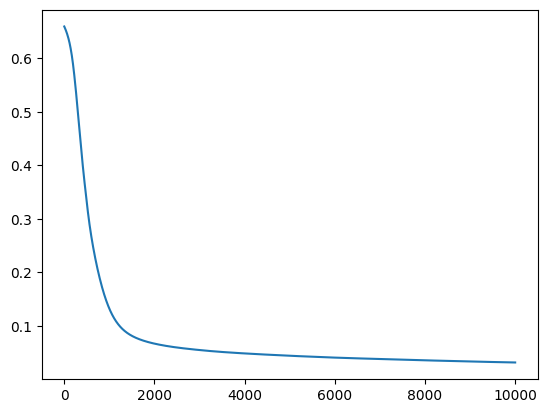

In [35]:
plt.plot(ann.loss)

# Test CNN

In [2]:
from NeuralNet import CNN
import torchvision

In [3]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
batch_size = 64
all_transforms = torchvision.transforms.Compose([torchvision.transforms.Resize((32,32)),
                                     torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])

# Create Training dataset
train_dataset = torchvision.datasets.ImageFolder(root = '/Users/pax/Documents/School/udemy/ML_A-Z/Machine Learning A-Z (Codes and Datasets)/Part 8 - Deep Learning/Section 40 - Convolutional Neural Networks (CNN)/Python/dataset/training_set',
                                             transform = all_transforms)

# Create Testing dataset
test_dataset = torchvision.datasets.ImageFolder(root = '/Users/pax/Documents/School/udemy/ML_A-Z/Machine Learning A-Z (Codes and Datasets)/Part 8 - Deep Learning/Section 40 - Convolutional Neural Networks (CNN)/Python/dataset/test_set',
                                            transform = all_transforms,)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [4]:
model = CNN(output_size=len(train_dataset.classes), device='mps')

In [5]:
model.fit(train_loader, max_iter=500, lr=0.01)

Epoch [1/500], Loss: 0.6927
Epoch [2/500], Loss: 0.6938
Epoch [3/500], Loss: 0.6903
Epoch [4/500], Loss: 0.6819
Epoch [5/500], Loss: 0.6879
Epoch [6/500], Loss: 0.6296
Epoch [7/500], Loss: 0.6491
Epoch [8/500], Loss: 0.6487
Epoch [9/500], Loss: 0.6578
Epoch [10/500], Loss: 0.5646
Epoch [11/500], Loss: 0.6405
Epoch [12/500], Loss: 0.5758
Epoch [13/500], Loss: 0.6235
Epoch [14/500], Loss: 0.5750
Epoch [15/500], Loss: 0.6100
Epoch [16/500], Loss: 0.6241
Epoch [17/500], Loss: 0.6123
Epoch [18/500], Loss: 0.5191
Epoch [19/500], Loss: 0.5951
Epoch [20/500], Loss: 0.5558
Epoch [21/500], Loss: 0.5580
Epoch [22/500], Loss: 0.5755
Epoch [23/500], Loss: 0.5086
Epoch [24/500], Loss: 0.5690
Epoch [25/500], Loss: 0.5516
Epoch [26/500], Loss: 0.5650
Epoch [27/500], Loss: 0.5280
Epoch [28/500], Loss: 0.5545
Epoch [29/500], Loss: 0.4982
Epoch [30/500], Loss: 0.5263
Epoch [31/500], Loss: 0.5318
Epoch [32/500], Loss: 0.5179
Epoch [33/500], Loss: 0.6440
Epoch [34/500], Loss: 0.5625
Epoch [35/500], Loss: 0

In [6]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to('mps')
        labels = labels.to('mps')
        outputs = model.predict(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 2000 test images: 77.3 %


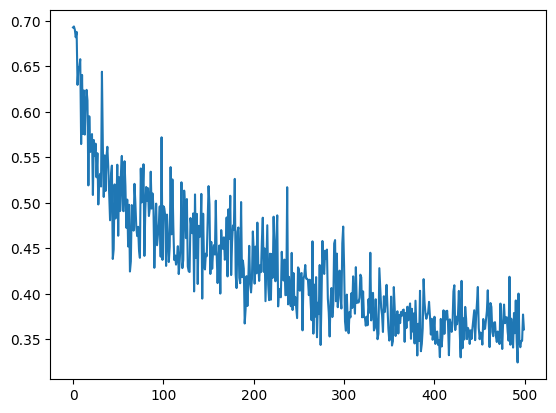

In [7]:
plt.plot(model.loss)